# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
#filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
#filenames1 = ['ccbar0']
#filenames1 = ['ccbar0','phi0']
#filenames1 = ['ccbar_20M','phi0']
#filenames1 = ['phi_new00','ccbar_new00','bbbar_new00']#,
#filenames2 = ['photon_100M_v0','photon_100M_v1']
#filenames2 = ['photon_100M_new_v0','photon_100M_new_v1','photon_100M_new_v2']
#filenames2 = ['photon_new00','photon_new10','photon_new20','photon_new30','photon_new40','photon_new50']
filenames2 = ['dalitz_25M_v0']
filenames1 = ['ccbar_hits0','bbbar_hits0','jpsi_hits0']#,'ccbar_new00'
filenames2 = ['photon_hits0','photon_hits1','photon_hits2','photon_hits3','photon_hits4','photon_hits5']

dalitz = ['dalitz_new00']
do_dalitz = 0

filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 100*120/48

In [3]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)
    data.loc[data['IsTrue0'] > -99, 'IsTrue0'] = 1

    for ifile in range(0,len(filenames2)):
        idata = pd.read_csv(filepath+f'{filenames2[ifile]}.csv')
        idata.loc[idata['IsTrue0'] > -99, 'IsTrue0'] = 0
        data = pd.concat([data,idata], sort=False)

    if do_dalitz:
        dalitzdata = pd.read_csv(filepath+f'{dalitz[0]}.csv')
        dalitzlen = int(dalitzdata.shape[0]/14)
        dalitzdata = dalitzdata[:dalitzlen]
        dalitzdata.loc[dalitzdata['IsTrue0'] > -99, 'IsTrue0'] = 0
        data = pd.concat([data,dalitzdata], sort=False)

    data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float16')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
        
    data = data[(data['Pt'] > 0.4) & (data['Pt'] < 25) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] < 25) & (data['reconpt'] < 999)  ]

    data['sdphi0'] = data['sdphi0'] - data['sdphi1']

    data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    data['Ecore'] = (data['Ecore']*data['The0']-data['reconpt']) / data['Ecore']
    data['reconpt'] = (data['Pt']-data['reconpt'])/data['Pt']
    #data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    #data['Ecore'] = data['Ecore']*data['The0']
    #data['Ecore1'] = data['Ecore']-data['reconpt']
    #data['Ecore2'] = data['Ecore1']/data['Ecore']
    #data['reconpt1'] = data['Pt']-data['reconpt']
    #data['reconpt2'] = data['reconpt1']/data['Pt']
    #data['reconphi0'] = (data['reconphi0'] - data['Phi0'])*data['Charge']

/home/yoren/.local/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


In [4]:
secondhitcolumns = ['SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                    'SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                    'SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                    'SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31']
for secondhitname in secondhitcolumns:
    data.loc[data[secondhitname] < -99, secondhitname] = -99
    data.loc[data[secondhitname] >  99, secondhitname] = -99

In [5]:
data.head()

NBDThit        Pt      Phi0      The0     PhiDC        ZDC     Alpha  \
3360470        3  1.270508  0.163086  1.000945  0.003366  -9.460938  0.079590   
85782          6  1.714844  3.535156  1.040457  3.656250  63.312500 -0.062622   
18568          1  5.425781  0.916504  1.006396  0.878418 -25.187500  0.017853   
1864955        3  1.973633  0.535645  1.006963  0.639648  25.906250 -0.053497   
1945896        4  0.633301 -0.130981  1.018505 -0.462646  41.656250  0.168579   

            Ecore  Centrality  Charge  ...     sdthe3  IsTrue3  \
3360470 -0.517352          10      -1  ...   0.408936        1   
85782   -0.037668          48       1  ...  -0.279785       25   
18568   -0.079048          21      -1  ... -10.000000        0   
1864955  0.279066          22       1  ... -10.000000        0   
1945896 -1.155475          59      -1  ... -10.000000        0   

         SecondHitPhiR3  SecondHitPhiL3  SecondHitTheR3  SecondHitTheL3  \
3360470        24.34375       21.437500       -6.683594       -9.843750   
85782          27.68750       23.000000       -0.337646        0.371826   
18568         -99.00000       11.265625      -99.000000        7.085938   
1864955       -99.00000       18.437500      -99.000000       16.312500   
1945896       -99.00000      -99.000000      -99.000000      -99.000000   

         SecondHitPhiR31  SecondHitPhiL31  SecondHitTheR31  SecondHitTheL31  
3360470        -34.84375        37.843750       -11.140625         4.691406  
85782          -33.18750        34.000000        17.125000       -13.726562  
18568          -99.00000        13.703125       -99.000000         4.648438  
1864955        -99.00000        17.875000       -99.000000        18.187500  
1945896        -99.00000       -99.000000       -99.000000       -99.000000  

[5 rows x 64 columns]

In [6]:
#data = data[11023232:]
print(data.size, data.shape)

760038528 (11875602, 64)


In [7]:
# удалим лишние колонки
data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','sdphi1','sdphi2','sdphi3','sdthe0','sdthe1','sdthe2','sdthe3','reconphi0','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
#data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
data = data.drop(columns = ['Alpha','NBDThit', 'Arm'] )
#data = data.drop(columns=  ['SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01'])
#data = data.drop(columns=  ['SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11'])
#data = data.drop(columns=  ['SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21'])
#data = data.drop(columns=  ['SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31'])


In [8]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 3, figsize=(15, 6))
    for i, feature in enumerate(['IsTrue0', 'Pt', 'SecondHitPhiR01', 'SecondHitPhiL01','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1' ]):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


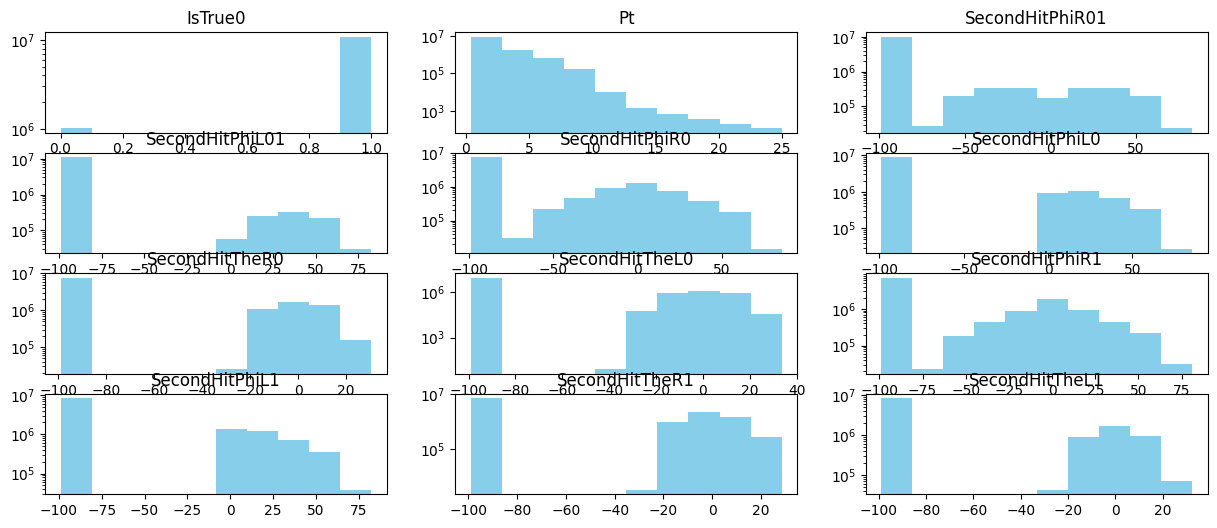

In [9]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [10]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/2)
    cut_off_test = int (data.shape[0]/4*3 + 1)

    print(cut_off_val,cut_off_test)
    all_test = data[cut_off_test:]
    y = data['IsTrue0']
    data = data.drop(columns = ['IsTrue0'])
    #data = data.drop(columns = ['sdphi0','sdphi1','sdphi2','sdphi3'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test, all_test

In [11]:
X_train_all, X_test, y_train_all, y_test, all_test = feature_engineering(data)

5937801 8906702


In [12]:
X_test

Pt     Ecore  Centrality  Charge   reconpt    sdphi0  \
6660911  0.484375 -0.764110          50       1 -0.070557  1.072266   
61914    0.968750 -0.278564          45       1 -0.192505 -0.039062   
4567848  1.965820  0.215861           5      -1  0.184326 -0.949219   
4003262  2.246094 -0.027698          90       1  0.014786 -0.126465   
3693096  0.905273 -0.255304          69      -1 -0.338623  0.937500   
...           ...       ...         ...     ...       ...       ...   
9912     1.277344 -2.148213          76      -1 -0.660645  1.266602   
3182091  5.007812  0.295575           8       1  0.234009 -0.538086   
1134407  0.459961 -0.449874          11       1 -0.496826  0.341797   
350792   1.001953  0.074848           2       1 -0.463867  2.406250   
2441502  1.206055 -0.499632           7      -1 -0.149780  0.124695   

         SecondHitPhiR0  SecondHitPhiL0  SecondHitTheR0  SecondHitTheL0  ...  \
6660911      -14.476562      -99.000000       13.343750      -99.000000  ...   
61914         21.890625       21.890625      -21.843750      -21.843750  ...   
4567848       12.781250       12.789062       -5.476562       -5.476562  ...   
4003262      -99.000000      -99.000000      -99.000000      -99.000000  ...   
3693096      -99.000000      -99.000000      -99.000000      -99.000000  ...   
...                 ...             ...             ...             ...  ...   
9912         -99.000000      -99.000000      -99.000000      -99.000000  ...   
3182091      -99.000000      -99.000000      -99.000000      -99.000000  ...   
1134407       -7.402344       24.390625       12.523438      -12.367188  ...   
350792        -7.804688       28.234375        4.957031        9.765625  ...   
2441502       -7.750000        6.484375       -0.135498      -10.710938  ...   

         SecondHitTheR21  SecondHitTheL21  SecondHitPhiR3  SecondHitPhiL3  \
6660911       -99.000000       -99.000000        9.578125      -99.000000   
61914         -99.000000       -99.000000        0.000000      -99.000000   
4567848        -5.261719       -99.000000       -1.436523       54.312500   
4003262       -99.000000       -99.000000        3.234375      -99.000000   
3693096       -99.000000       -99.000000      -99.000000      -99.000000   
...                  ...              ...             ...             ...   
9912          -99.000000       -99.000000      -99.000000       53.656250   
3182091        20.390625       -99.000000      -99.000000      -99.000000   
1134407        -4.785156        13.546875      -99.000000        7.960938   
350792         11.687500       -99.000000        8.828125        6.914062   
2441502         9.031250       -99.000000      -99.000000       28.765625   

         SecondHitTheR3  SecondHitTheL3  SecondHitPhiR31  SecondHitPhiL31  \
6660911      -16.468750      -99.000000       -99.000000       -99.000000   
61914         -3.017578      -99.000000        -1.048828       -99.000000   
4567848       -5.101562      -16.031250       -14.351562        54.312500   
4003262       -1.347656      -99.000000         3.234375       -99.000000   
3693096      -99.000000      -99.000000       -99.000000       -99.000000   
...                 ...             ...              ...              ...   
9912         -99.000000       -0.406006       -99.000000       -99.000000   
3182091      -99.000000      -99.000000       -99.000000       -99.000000   
1134407      -99.000000       12.710938       -99.000000         6.093750   
350792       -18.390625        9.781250       -25.843750         1.864258   
2441502      -99.000000        1.606445       -99.000000       -99.000000   

         SecondHitTheR31  SecondHitTheL31  
6660911       -99.000000       -99.000000  
61914           4.160156       -99.000000  
4567848       -21.765625       -19.656250  
4003262       -12.109375       -99.000000  
3693096       -99.000000       -99.000000  
...                  ...              ...  
9912          -99.000000       -99.000000  

In [13]:
X_train = X_train_all
y_train = y_train_all
w_train = y_train-1
w_test = y_test-1
w_train_all = y_train_all - 1
w_train = w_train*(-hadron_weight)+1
w_test = w_test*(-hadron_weight)+1
w_train_all = w_train_all*(-hadron_weight)+1

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [14]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=4, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train, w_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.09      1.00      0.16    255317
           1       0.00      0.00      0.00   2713583

    accuracy                           0.09   2968900
   macro avg       0.04      0.50      0.08   2968900
weighted avg       0.01      0.09      0.01   2968900

confusion matrix
[[ 255317       0]
 [2713583       0]]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.2],
    "min_samples_split": [0.001],
    "max_depth":[12],
    "max_features":["sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[12]
    }

classif = GradientBoostingClassifier()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)

clf.fit(X_train, y_train, sample_weight=w_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

точность:  0.19632692242918254
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.001, 'n_estimators': 12}
0.20120129743276274
time of execution (sec) 589.0832026004791


# Cross Validation

In [16]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.10      1.00      0.18    255317
           1       1.00      0.12      0.22   2713583

    accuracy                           0.20   2968900
   macro avg       0.55      0.56      0.20   2968900
weighted avg       0.92      0.20      0.21   2968900



In [17]:
y_pred_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Model Evaluation

log loss: 0.140667991288359
roc auc: 0.9115155783608623
f1 score: 0.9221994481932153


Text(0.5, 1.0, 'ROC AUC Curve')

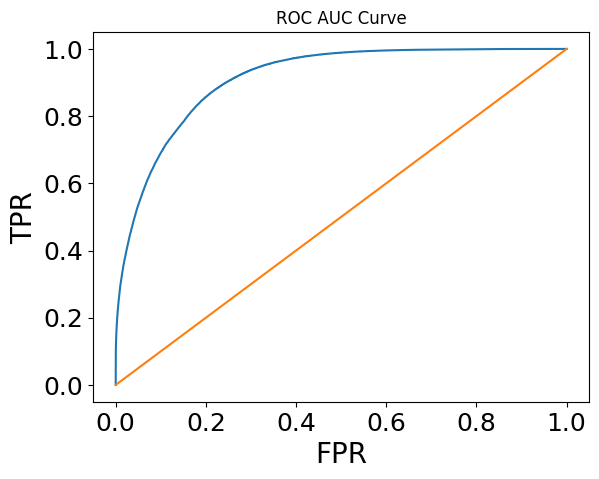

In [18]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR", fontsize=20)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.title('ROC AUC Curve')

In [19]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.29317758206846434


In [369]:
i = 363000
print(round(tpr[i],3),round(fpr[i]/tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
#print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

0.975 0.4172
0.059511564980906206 0.4066865896121292 0.9748516997637441


In [370]:
print(sum(predicted),len(predicted))

327870 2968900


In [371]:
kek_data = data
kek_data = kek_data.drop(columns = ['IsTrue0'])
proba_loc = clf.predict_proba(kek_data)
print(proba_loc[0][1])

0.08827949740490763


In [372]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Conv.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

In [373]:
mycute,mycuth, AIcute, AIcuth = 0.1, 0.1, 0.1, 0.1
norm_e, norm_h = 0.1, 0.1
data0 = data.reset_index()  # make sure indexes pair with number of rows

sigma, sigma_veto = 3, -2

pt = 0.
pt_prev = 0.
IsTrue0_prev = 1
IsTrue0 = 1
counter =-1
cont = 1
myml = 1
myml_now = 1
centrality, centralitynow = 0, 0
SecondHitPhiL0, SecondHitPhiL1, SecondHitPhiL2, SecondHitPhiL3 = 0,0,0,0
pSecondHitPhiL0, pSecondHitPhiL1, pSecondHitPhiL2, pSecondHitPhiL3 = 0,0,0,0
SecondHitTheL0, SecondHitTheL1, SecondHitTheL2, SecondHitTheL3 = 0,0,0,0
pSecondHitTheL0, pSecondHitTheL1, pSecondHitTheL2, pSecondHitTheL3 = 0,0,0,0
for index, row in data0.iterrows():
    counter+=1
    if counter>400000: break
    SecondHitPhiL0loc, SecondHitPhiL1loc, SecondHitPhiL2loc, SecondHitPhiL3loc = row['SecondHitPhiL0'], row['SecondHitPhiL1'], row['SecondHitPhiL2'], row['SecondHitPhiL3']
    SecondHitTheL0loc, SecondHitTheL1loc, SecondHitTheL2loc, SecondHitTheL3loc = row['SecondHitTheL0'], row['SecondHitTheL1'], row['SecondHitTheL2'], row['SecondHitTheL3']
    sdthe0, sdthe1, sdthe2, sdthe3 = 0, 0, 0, 0
    centralityloc, ptloc, IsTrue0loc = row['Centrality'], row['Pt'], row['IsTrue0']
    if abs(pt -  ptloc) < 1e-6: 
        cont = 0
        myml_now*=proba_loc[counter][1]>thresholds[i]
    else: 
        pt_prev = pt
        pt = ptloc
        centrality = centralitynow
        centralitynow = centralityloc
        SecondHitPhiL0, SecondHitPhiL1, SecondHitPhiL2, SecondHitPhiL3 = pSecondHitPhiL0, pSecondHitPhiL1, pSecondHitPhiL2, pSecondHitPhiL3 
        pSecondHitPhiL0, pSecondHitPhiL1, pSecondHitPhiL2, pSecondHitPhiL3 = SecondHitPhiL0loc, SecondHitPhiL1loc, SecondHitPhiL2loc, SecondHitPhiL3loc
        SecondHitTheL0, SecondHitTheL1, SecondHitTheL2, SecondHitTheL3 = pSecondHitTheL0, pSecondHitTheL1, pSecondHitTheL2, pSecondHitTheL3 
        pSecondHitTheL0, pSecondHitTheL1, pSecondHitTheL2, pSecondHitTheL3 = SecondHitTheL0loc, SecondHitTheL1loc, SecondHitTheL2loc, SecondHitTheL3loc 
        IsTrue0 = IsTrue0_prev
        IsTrue0_prev = IsTrue0loc
        myml = myml_now
        myml_now = proba_loc[counter][1]>thresholds[i]
        cont = 1

    if not cont: continue
    if pt_prev<0.4 or centrality<0: continue
    
    if IsTrue0: e_pt_hist_NC.Fill(pt_prev,centrality)
    else:    h_pt_hist_NC.Fill(pt_prev,centrality)
    if not ( (SecondHitPhiL1>0 and SecondHitPhiL1<12.5 and abs(SecondHitTheL1)<12.5) \
            or (SecondHitPhiL2>0 and SecondHitPhiL2<25 and abs(SecondHitTheL2)<12.5) \
            or (SecondHitPhiL3>0 and SecondHitPhiL3<25 and abs(SecondHitTheL3)<12.5) ):
        if IsTrue0: 
            mycute+=1
            e_pt_hist_SC.Fill(pt_prev,centrality)
        else: 
            mycuth+=1+hadron_weight
            h_pt_hist_SC.Fill(pt_prev,centrality)
    if myml: 
        if IsTrue0: 
            AIcute+=1
            e_pt_hist_AI.Fill(pt_prev,centrality)
        else: 
            AIcuth+=1+hadron_weight
            h_pt_hist_AI.Fill(pt_prev,centrality)
    if IsTrue0: norm_e+=1
    else: norm_h+=1+hadron_weight
    #if counter<10: 
    #    print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

In [374]:
print(norm_e, norm_h,round(mycute/norm_e,3),round(mycuth/norm_h,3), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i]/tpr[i],3))

365330.1 8675564.1 0.701 0.221 0.975 0.405 0.415 0.417


In [375]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3), round(30*AIcute/norm_e/AIcuth*norm_h))

0.76 1.39 1.829 72


In [376]:
%run input/Format.ipynb
%jsroot on

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [377]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "prompt e^{-} " , "#gamma#rightarrow e^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(312)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(3)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(3)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    proj.SetMinimum(2)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    phoj_s = e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2)
    phoj_s.Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.65,0.65,0.95,0.95,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(phoj_s,"std","l")
    legends[-1].AddEntry(e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(3)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(3)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(3)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    projh.Draw()
    phoj_sd = h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2)
    phoj_sd.Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.7,0.65,0.95,0.95,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(phoj_sd,"std","l")
    legends[-1].AddEntry(h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()
c1.Draw()
print(h_pt_hist_NC.GetBinContent(10,1),e_pt_hist_NC.GetBinContent(10,1))

269.0 1662.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [378]:
if False:
    e_pt_hist_AI.Write()
    h_pt_hist_AI.Write()
    e_pt_hist_SC.Write()
    h_pt_hist_SC.Write()
    e_pt_hist_NC.Write()
    h_pt_hist_NC.Write()
    outfile.Close()

In [379]:
import pickle
with open('output/bdt_conv.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[0 0 1 0 0 0 0 0 0 0]


In [380]:
import pickle
# load
with open('output/bdt_conv.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[0 0 1 0 0 0 0 0 0 0]


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.486605 to fit



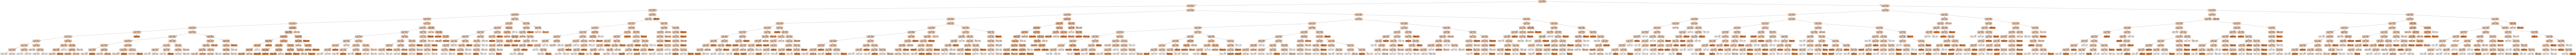

In [381]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [382]:
clf2.predict(kek_data[0:100])

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int32)

In [383]:
clf2.predict_proba(kek_data[0:100])

array([[0.9117205 , 0.0882795 ],
       [0.90488571, 0.09511429],
       [0.20220374, 0.79779626],
       [0.87288907, 0.12711093],
       [0.78366789, 0.21633211],
       [0.90228048, 0.09771952],
       [0.95430507, 0.04569493],
       [0.58645269, 0.41354731],
       [0.8894872 , 0.1105128 ],
       [0.807901  , 0.192099  ],
       [0.22339799, 0.77660201],
       [0.7662881 , 0.2337119 ],
       [0.91880471, 0.08119529],
       [0.8962798 , 0.1037202 ],
       [0.72157982, 0.27842018],
       [0.91565738, 0.08434262],
       [0.73221571, 0.26778429],
       [0.75956016, 0.24043984],
       [0.90130469, 0.09869531],
       [0.74497375, 0.25502625],
       [0.83905433, 0.16094567],
       [0.8715938 , 0.1284062 ],
       [0.85923578, 0.14076422],
       [0.90392389, 0.09607611],
       [0.86981332, 0.13018668],
       [0.73649403, 0.26350597],
       [0.81730494, 0.18269506],
       [0.89799901, 0.10200099],
       [0.20024173, 0.79975827],
       [0.91883058, 0.08116942],
       [0.

In [384]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.001, 'n_estimators': 12}


In [385]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.807901  , 0.192099  ],
       [0.22339799, 0.77660201],
       [0.7662881 , 0.2337119 ],
       [0.91880471, 0.08119529],
       [0.8962798 , 0.1037202 ],
       [0.72157982, 0.27842018],
       [0.91565738, 0.08434262],
       [0.73221571, 0.26778429],
       [0.75956016, 0.24043984],
       [0.90130469, 0.09869531],
       [0.74497375, 0.25502625]])

In [386]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,10):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[-1.2211109   0.20658524 -1.31451231 -2.16493361 -1.93264425 -1.14927557
 -2.19832133 -0.74235797 -1.15982701 -1.94986323]
[-3.08650486 -3.13696959 -2.9003929  -3.21350099 -3.00079063 -2.9003929
 -3.24077693 -3.13034617 -2.9003929  -3.00079063 -2.9003929 ]
[0.22774101 0.55146341 0.21173275 0.10294396 0.12645819 0.24062143
 0.09990134 0.32248874 0.23869872 0.12456827]


In [387]:
best_gbc = clf2.best_estimator_

In [388]:
n_estim = best_gbc.n_estimators

In [389]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[-1.43642864  1.24597314 -1.18746903 -2.42621633 -2.15655578 -0.95231157
 -2.3847549  -1.00589337 -1.1502696  -2.21180599]
[0.192099   0.77660201 0.2337119  0.08119529 0.1037202  0.27842018
 0.08434262 0.26778429 0.24043984 0.09869531]
0.2


In [390]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [391]:
print(log_odds_predictions)

[[-1.7477143412573373, 2.0, -1.1612912665476918, -1.7673006416131989, -1.6669221111672727, -1.3945080495103768, -0.8657933635761251, -1.8518256839249378, -1.3945080495103768, -1.7445717645017973], [-1.1885762675454818, -1.5785372267923434, -0.9253070452704673, -1.5295585827207154, -1.4519110993440547, -0.267781148661342, -1.50825215100379, -1.4591080495207023, -0.6105136347673503, -1.4192595519309603], [-0.48192243368376786, -1.4541086176376283, -0.8478844915162811, -1.2957454017386796, -1.2355427022329866, -1.0374264768881858, -1.3896243430361142, -1.3871975083339543, -0.9219220687025816, -1.4453144000352014], [-0.9023771747191502, -0.9735567846833395, -0.6825101516105206, -1.1890792612697947, -1.0949273919959543, -0.6825101516105206, -1.1890792612697947, 0.1142044766443841, -0.6866798490126853, -1.173912926603709], [-0.8191526311955584, -0.25269077472257107, -0.8712893776027799, -1.0765793542258335, -1.0380866845110719, 0.33567468509966153, -1.1200623774184586, -0.9512306321491728, 0

In [392]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(10)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 -1.2211109036184455
[-1.43642864  1.24597314 -1.18746903 -2.42621633 -2.15655578 -0.95231157
 -2.3847549  -1.00589337 -1.1502696  -2.21180599]


In [393]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

12
1
[[-1.7477143412573373, -1.1885762675454818, -0.48192243368376786, -0.9023771747191502, -0.8191526311955584, -0.8466489354158694, -0.9464025735678188, -0.515968681617706, -0.2454283031055774, 1.5886368240160402, -0.5124126640203891, -0.5641759939186959], [2.0, -1.5785372267923434, -1.4541086176376283, -0.9735567846833395, -0.25269077472257107, -0.9627293578018636, -1.2905541181855713, 1.8133437671621597, 2.5951068773325985, 1.1366524563134823, -0.34567969152245104, 5.5426191716227], [-1.1612912665476918, -0.9253070452704673, -0.8478844915162811, -0.6825101516105206, -0.8712893776027799, -0.5507593202309213, -0.29398667193266903, -0.4670072141321796, -0.41143645983361554, -0.36108954736004995, 0.6493113075760737, -0.014094924834889212], [-1.7673006416131989, -1.5295585827207154, -1.2957454017386796, -1.1890792612697947, -1.0765793542258335, -0.9643664878427807, -0.7461735519374477, -0.6874331793983778, -1.0213942987016755, -0.5470372864977436, -0.9980529626509893, -0.308360639245488

In [394]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [395]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [396]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[17] <= -5.263671875) if (x[23] <= 0.003726959228515625) if (x[9] <= -11.29296875) if (x[37] <= -19.3515625) if (x[14] <= -19.7734375) if (x[0] <= 4.900390625) if (x[5] > -0.3626708984375) if (x[0] <= 3.2451171875) if (x[31] <= 1.19287109375) if (x[5] > 0.2825927734375) if (x[30] <= -55.609375) if (x[31] <= 1.05712890625)   return -1.1612912665476918;  // | based on 1,018,202 samples
        if  (x[17] <= -5.263671875) if (x[23] <= 0.003726959228515625) if (x[9] <= -11.29296875) if (x[37] <= -19.3515625) if (x[14] <= -19.7734375) if (x[0] <= 4.900390625) if (x[5] > -0.3626708984375) if (x[0] <= 3.2451171875) if (x[31] <= 1.19287109375) if (x[5] <= 0.2825927734375) if (x[22] <= -8.91796875) if (x[14] <= -20.0859375)   return -1.3945080495103768;  // | based on 831,858 samples
        if  (x[17] <= -5.263671875) if (x[23] <= 0.003726959228515625) if (x[9] <= -11.29296875) if (x[37] <= -19.3515625) if (x[14] <= -19.7734375) if (x[0] <= 4.90039062

In [397]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [398]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[17] <= -5.263671875) and (x[23] <= 0.003726959228515625) and (x[9] <= -11.29296875) and (x[37] <= -19.3515625) and (x[14] <= -19.7734375) and (x[0] <= 4.900390625) and (x[5] > -0.3626708984375) and (x[0] <= 3.2451171875) and (x[31] <= 1.19287109375) and (x[5] > 0.2825927734375) and (x[30] <= -55.609375) and (x[31] <= 1.05712890625) :  return -1.1612912665476918  # | based on 1,018,202 samples
        if (x[17] <= -5.263671875) and (x[23] <= 0.003726959228515625) and (x[9] <= -11.29296875) and (x[37] <= -19.3515625) and (x[14] <= -19.7734375) and (x[0] <= 4.900390625) and (x[5] > -0.3626708984375) and (x[0] <= 3.2451171875) and (x[31] <= 1.19287109375) and (x[5] <= 0.2825927734375) and (x[22] <= -8.91796875) and (x[14] <= -20.0859375) :  return -1.3945080495103768  # | based on 831,858 samples
        if (x[17] <= -5.263671875) and (x[23] <= 0.003726959228515625) and (x[9] <= -11.29296875) and (x[37] <= -19.3515625) and (x[14]

In [399]:
def mytree(x,y):
    return 0

In [400]:
def mygradboost (x_in, lerning_rate = 0.2):
    prob = 0
    for iestim in range (n_estim):
        prob+=lerning_rate*mytree(iestim, x_in)
    return 1. / ( 1. + np.exp( - prob ) )


In [401]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [402]:
kek_data[9:19].values.tolist()[0][20]

-99.0

In [403]:
iestim = 10
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:10].values.tolist())
print(y)
print(kek_data[9+i:10+i].values.tolist()[0][15])
myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(1)]
print(myf)

[-0.51241266]
-99.0
[0]


In [404]:
input_x = [ kek_data[9:19].values.tolist()[0][i] for i in range(len(kek_data[9:19].values.tolist()[0])) ]
print(input_x)

[1.1865234375, 0.03924144270263441, 8.0, -1.0, 0.00905609130859375, -0.30126953125, -43.8125, -99.0, 18.1875, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -21.0625, 45.40625, 7.8828125, 14.8203125, -21.0625, 61.25, 19.09375, 18.296875, -25.203125, -99.0, 20.765625, -99.0, -48.875, -99.0, -8.578125, -99.0]


In [405]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
y = [y[i][1] for i in range(len(y))]
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[0.19209900417738998, 0.7766020141634814, 0.2337119028294784, 0.08119529200872899, 0.10372019723045221, 0.27842018446044137, 0.0843426234901733, 0.26778429296788375, 0.2404398421739685, 0.09869530582359533]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [406]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['Pt', 'Ecore', 'Centrality', 'Charge', 'reconpt', 'sdphi0', 'SecondHitPhiR0', 'SecondHitPhiL0', 'SecondHitTheR0', 'SecondHitTheL0', 'SecondHitPhiR01', 'SecondHitPhiL01', 'SecondHitTheR01', 'SecondHitTheL01', 'SecondHitPhiR1', 'SecondHitPhiL1', 'SecondHitTheR1', 'SecondHitTheL1', 'SecondHitPhiR11', 'SecondHitPhiL11', 'SecondHitTheR11', 'SecondHitTheL11', 'SecondHitPhiR2', 'SecondHitPhiL2', 'SecondHitTheR2', 'SecondHitTheL2', 'SecondHitPhiR21', 'SecondHitPhiL21', 'SecondHitTheR21', 'SecondHitTheL21', 'SecondHitPhiR3', 'SecondHitPhiL3', 'SecondHitTheR3', 'SecondHitTheL3', 'SecondHitPhiR31', 'SecondHitPhiL31', 'SecondHitTheR31', 'SecondHitTheL31']
38
